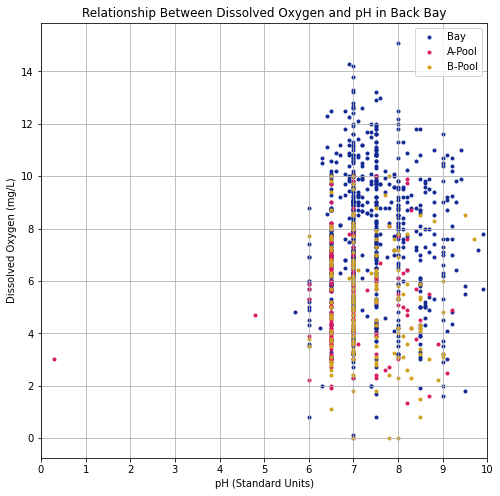

<Figure size 432x288 with 0 Axes>

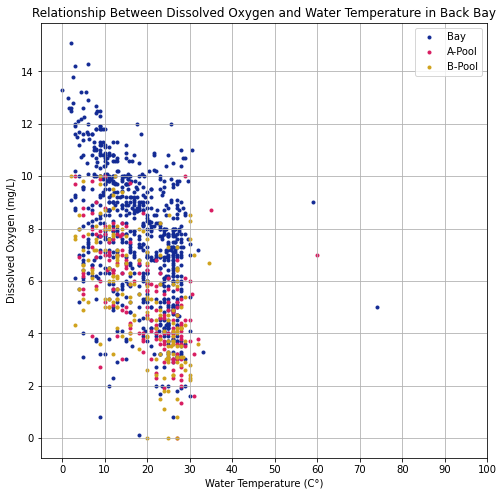

<Figure size 432x288 with 0 Axes>

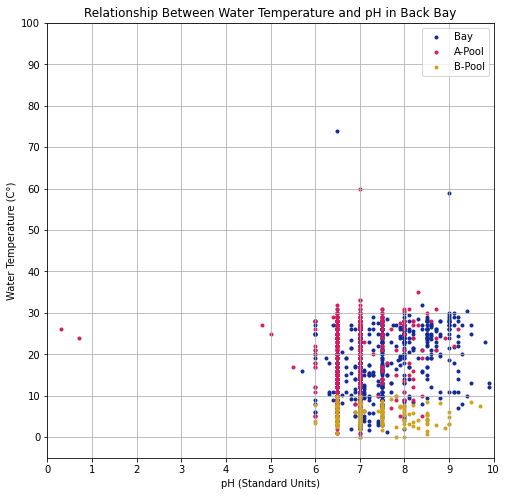

<Figure size 432x288 with 0 Axes>

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


#Data on Back Bay water quality created by the U.S. Fish and Wildlife Service
#https://catalog.data.gov/dataset/water-quality-data-a3c08


df = pd.read_csv("BKB_WaterQualityData_2020084.csv")

#split dataset by water bodies
df_bay = df[(df["Site_Id"]=="Bay")].copy()
df_a = df[(df["Site_Id"]=="A")].copy()
df_b = df[(df["Site_Id"]=="B")].copy()


#data for bay area----------------------------------------------------------
bay_oxygen = df_bay["Dissolved Oxygen (mg/L)"].to_numpy()
bay_oxy_mask = np.isfinite(bay_oxygen)
bay_ph = df_bay["pH (standard units)"].to_numpy()
bay_ph_mask = np.isfinite(bay_ph)
bay_temp = df_bay["Water Temp (?C)"].to_numpy()
bay_temp_mask = np.isfinite(bay_temp)

#mask all values that do not have both a pH and oxygen level to compare
bay_mask = np.logical_and(bay_oxy_mask, bay_ph_mask)

bay_oxygen_masked = bay_oxygen[bay_mask]
bay_ph_masked = bay_ph[bay_mask]

#mask all values that do not have both a water temperature and oxygen level to compare
bay_mask_scatter2 = np.logical_and(bay_temp_mask, bay_oxy_mask)

#mask all values that do not have both a water temperature and pH to compare
bay_mask_scatter3 = np.logical_and(bay_temp_mask, bay_ph_mask)


#data for A-pool----------------------------------------------------------
a_oxygen = df_a["Dissolved Oxygen (mg/L)"].to_numpy()
a_oxy_mask = np.isfinite(a_oxygen)
a_ph = df_a["pH (standard units)"].to_numpy()
a_ph_mask = np.isfinite(a_ph)
a_temp = df_a["Water Temp (?C)"].to_numpy()
a_temp_mask = np.isfinite(a_temp)

#mask all values that do not have both a pH and oxygen level to compare
a_mask = np.logical_and(a_oxy_mask, a_ph_mask)

a_oxygen_masked = a_oxygen[a_mask]
a_ph_masked = a_ph[a_mask]

#mask all values that do not have both a water temperature and oxygen level to compare
a_mask_scatter2 = np.logical_and(a_temp_mask, a_oxy_mask)

#mask all values that do not have both a water temperature and pH to compare
a_mask_scatter3 = np.logical_and(a_temp_mask, a_ph_mask)



#data for B-pool----------------------------------------------------------
b_oxygen = df_b["Dissolved Oxygen (mg/L)"].to_numpy()
b_oxy_mask = np.isfinite(b_oxygen)
b_ph = df_b["pH (standard units)"].to_numpy()
b_ph_mask = np.isfinite(b_ph)
b_temp = df_b["Water Temp (?C)"].to_numpy()
b_temp_mask = np.isfinite(b_temp)

#mask all values that do not have both a pH and oxygen level to compare
b_mask = np.logical_and(b_oxy_mask, b_ph_mask)

b_oxygen_masked = b_oxygen[b_mask]
b_ph_masked = b_ph[b_mask]

#mask all values that do not have both a water temperature and oxygen level to compare
b_mask_scatter2 = np.logical_and(b_temp_mask, b_oxy_mask)


#mask all values that do not have both a water temperature and pH to compare
b_mask_scatter3 = np.logical_and(b_temp_mask, b_ph_mask)



#scatter plot for pH and dissolved oxygen relationship
plt.figure(figsize=(8,8))
plt.grid(True)
plt.title("Relationship Between Dissolved Oxygen and pH in Back Bay")
plt.xlabel("pH (Standard Units)")
plt.ylabel("Dissolved Oxygen (mg/L)")
plt.xlim((0,10))
plt.xticks(np.arange(0, 11, step=1))

plt.scatter(bay_ph_masked, bay_oxygen_masked, color='#122a94', s=9)
plt.scatter(a_ph_masked, a_oxygen_masked, color='#D81B60', s=9)
plt.scatter(b_ph_masked, b_oxygen_masked, color='#D0A21B', s=9)
plt.legend(['Bay', 'A-Pool', 'B-Pool'])
plt.show()
plt.clf()

#scatter plot for water temperature and dissolved oxygen relationship
plt.figure(figsize=(8,8))
plt.grid(True)
plt.title("Relationship Between Dissolved Oxygen and Water Temperature in Back Bay")
plt.xlabel("Water Temperature (C°)")
plt.ylabel("Dissolved Oxygen (mg/L)")
plt.xlim([-5,100])
plt.xticks(np.arange(0, 101, step=10))

plt.scatter(bay_temp[bay_mask_scatter2], bay_oxygen[bay_mask_scatter2], color='#122a94', s=9)
plt.scatter(a_temp[a_mask_scatter2], a_oxygen[a_mask_scatter2], color='#D81B60', s=9)
plt.scatter(b_temp[b_mask_scatter2], b_oxygen[b_mask_scatter2], color='#D0A21B', s=9)
plt.legend(['Bay', 'A-Pool', 'B-Pool'])
plt.show()
plt.clf()

#scatter plot for water temperature and ph
plt.figure(figsize=(8,8))
plt.grid(True)
plt.title("Relationship Between Water Temperature and pH in Back Bay")
plt.xlabel("pH (Standard Units)")
plt.ylabel("Water Temperature (C°)")
plt.xlim((0,10))
plt.xticks(np.arange(0, 11, step=1))
plt.ylim([-5,100])
plt.yticks(np.arange(0, 101, step=10))

plt.scatter(bay_ph[bay_mask_scatter3], bay_temp[bay_mask_scatter3], color='#122a94', s=9)
plt.scatter(a_ph[a_mask_scatter3], a_temp[a_mask_scatter3], color='#D81B60', s=9)
plt.scatter(b_ph[b_mask_scatter3], b_oxygen[b_mask_scatter3], color='#D0A21B', s=9)
plt.legend(['Bay', 'A-Pool', 'B-Pool'])
plt.show()
plt.clf()
